Problem Statement:
#ML Lab 3 Assignment: 

Q1: Design a simple ands multi variable linear regression system considering synthetic dataset considering:

1. Speed and Distance travelled by a car, where speed being independent variable. 20,000 samples
2. Consider a dataset, number of no. of experienced years Vs. Salary paid in IT industry.
3. To perform a electrical consumption audit for a 10 research labs in university, we need to predict which lab has highest power consumption > 200 units/month given the input data: ID of lab (each may have 15 to max 200 GPUs) Vs Power consumed in units.

Q2: Consider any medical domain/ dataset of current competitions from Kaggle, UCI or Google datasets and perform the linear regression  
Note: You may think of solutions that can lead to benchmark submissions.


Report and commented code is mandatory. In report, expected on data distributions, visualizations, data cleaning, 


# Task 1
**Question 1
Speed Vs distance**

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

**This code generates a regression dataset with 60000 samples, each sample having 1 feature and 1 target. The target is generated with noise equal to 10. The data is then visualized using a scatter plot. The random state is set to 9 to ensure reproducibility of the results.**

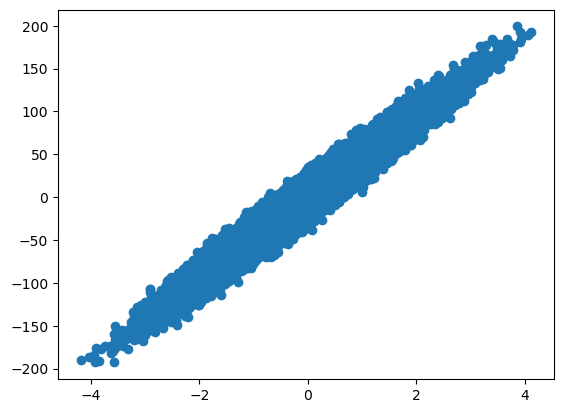

In [214]:
X, y = make_regression(
    n_samples = 60000,
    n_features = 1,
    noise = 10, n_targets= 1,
    random_state = 9
)
plt.scatter(X, y)
plt.show()

In [49]:
y

array([-87.43542871,  -1.01760403, -45.39096346, ...,  31.65882588,
        69.03616954,   7.56019231])

**This code creates a pandas dataframe from the generated regression dataset (X, y) where X represents the features and y represents the targets. The dataframe is named "dataset" and the feature is given the column name "speed". A new column "distance" is added to the dataframe, which is assigned the values of y (the target).**

In [50]:
dataset = pd.DataFrame(X)
columns = ['speed']
dataset.columns = columns
dataset['distance'] = y

In [51]:
dataset

,speed,distance
0,-1.809154,-87.435429
1,0.254935,-1.017604
2,-0.503472,-45.390963
3,-0.558529,-36.550319
4,0.247218,14.432087
...,...,...
59995,0.016661,-2.599214
59996,-0.072863,-5.232913
59997,0.855921,31.658826
59998,1.254454,69.036170


**This code filters the "dataset" dataframe to only include rows where the value in the "speed" column is greater than 0 and the value in the "distance" column is greater than 0. The resulting data is stored in a new variable named "data".**

In [52]:
data = dataset[(dataset['speed']>0) & (dataset['distance']>0)]

In [53]:
data

,speed,distance
4,0.247218,14.432087
5,0.827531,17.624877
11,1.421660,72.366177
14,0.320332,24.480874
15,1.261676,62.028751
...,...,...
59988,0.196597,4.478268
59994,0.739272,33.449908
59997,0.855921,31.658826
59998,1.254454,69.036170


In [54]:
df = data.tail(data.shape[0] -7885)

In [55]:
df.shape

(20000, 2)

In [56]:
df.describe()

,speed,distance
count,20000.000000,20000.000000
mean,0.844826,40.943445
std,0.593205,28.656220
min,0.000091,0.003140
25%,0.386817,18.844492
50%,0.730228,35.490722
75%,1.182661,57.511156
max,4.122615,193.038978


In [57]:
df['speed'] = df['speed']*100

C:\Users\asath\AppData\Local\Temp\ipykernel_12116\3223660622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed'] = df['speed']*100


In [58]:
df.reset_index(inplace=True)
df

,index,speed,distance
0,16630,121.839289,63.036386
1,16631,120.007870,59.757576
2,16632,183.213436,93.996049
3,16633,106.536804,70.732736
4,16640,1.850670,0.940924
...,...,...,...
19995,59988,19.659724,4.478268
19996,59994,73.927198,33.449908
19997,59997,85.592052,31.658826
19998,59998,125.445433,69.036170


In [59]:
df.describe()

,index,speed,distance
count,20000.000000,20000.000000,20000.000000
mean,38267.022450,84.482582,40.943445
std,12537.491954,59.320460,28.656220
min,16630.000000,0.009084,0.003140
25%,27378.500000,38.681696,18.844492
50%,38216.500000,73.022782,35.490722
75%,49236.750000,118.266118,57.511156
max,59999.000000,412.261503,193.038978


**converts them into numpy arrays, and reshapes each array into a 2-dimensional array of shape (n_samples, 1), where n_samples is the number of samples in the data. This is likely done to prepare the data for use in a machine learning model that expects input data to be in this format. The reshaped arrays are stored in the variables "speed" and "distance", respectively.**

In [66]:
speed = np.array(df['speed'])
distance = np.array(df['distance'])
speed=speed.reshape(-1,1)
distance=distance.reshape(-1,1)

In [67]:
speed_train, speed_test, distance_train, distance_test = train_test_split(speed,distance,test_size=0.2,random_state=42)

In [68]:
reg = LinearRegression()

reg.fit(speed_train, distance_train)

y_pred = reg.predict(speed_test)
x_pred = reg.predict(speed_train)

**This code creates a scatter plot of the training data, represented by the "speed_train" and "distance_train" arrays. The plot also includes a line plot of the predicted values, represented by the "x_pred" variable, plotted against the "speed_train" variable..**

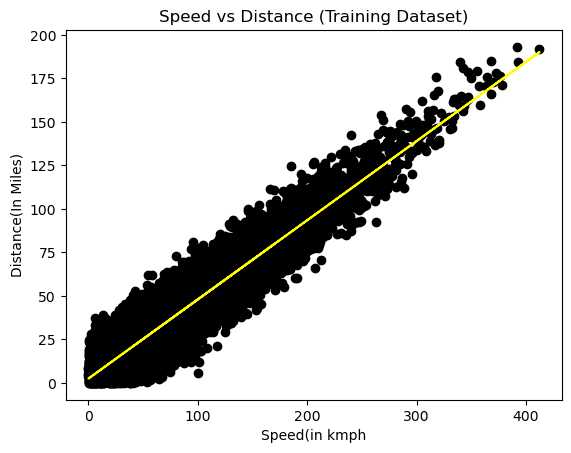

In [72]:
plt.scatter(speed_train, distance_train, color="black")   
plt.plot(speed_train, x_pred, color="yellow")    
plt.title("Speed vs Distance (Training Dataset)")  
plt.xlabel("Speed(in kmph")  
plt.ylabel("Distance(In Miles)")  
plt.show()   

In [75]:
print(metrics.r2_score(distance_test, y_pred))

0.8887805184295589


**Q2 Years of experience vs Salary**

In [76]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [77]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [78]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [79]:
df = df.drop(columns=['Unnamed: 0'])

In [80]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


C:\Users\asath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

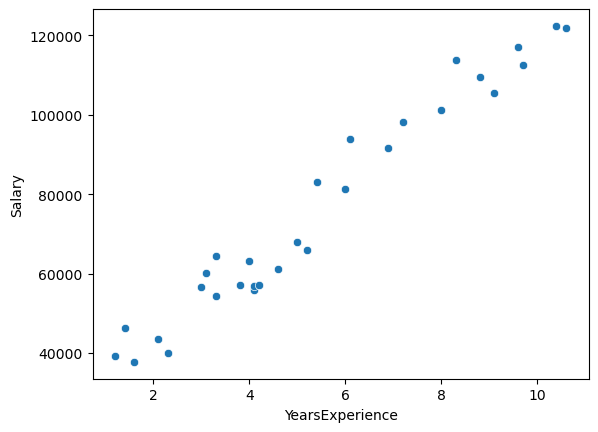

In [95]:
import seaborn as sns
sns.scatterplot('YearsExperience','Salary',data=df)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

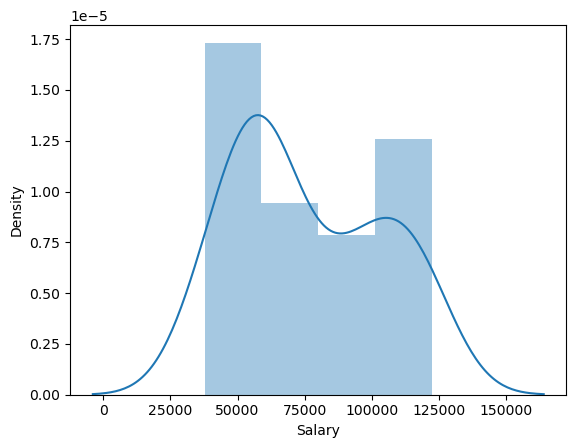

In [106]:
sns.distplot(df['Salary'])

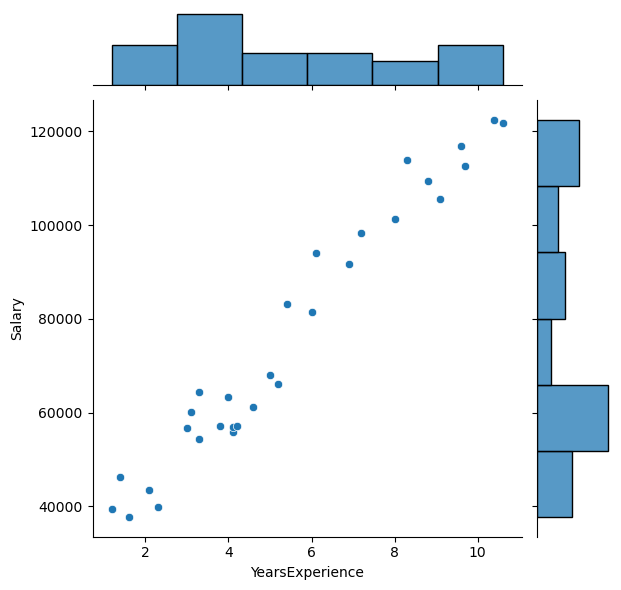

In [110]:
sns.jointplot(data=df, x="YearsExperience", y="Salary")

In [123]:
x = np.array(df['YearsExperience'])
y = np.array(df['Salary'])
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [115]:
x_train, x_test, y_train, x_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
reg = LinearRegression()

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
x_pred = reg.predict(x_train)

In [129]:
x_pred

array([[122387.880839  ],
       [107309.77632215],
       [ 63017.8443039 ],
       [ 35688.77986711],
       [ 46054.97672244],
       [ 73384.04115923],
       [ 52651.64744857],
       [ 63960.2258362 ],
       [ 63017.8443039 ],
       [ 99770.72406372],
       [ 37573.54293172],
       [ 39458.30599632],
       [110136.92091906],
       [ 44170.21365784],
       [ 92231.6718053 ],
       [114848.82858057],
       [ 80923.09341766],
       [124272.6439036 ],
       [ 89404.52720839],
       [ 55478.79204548],
       [ 62075.4627716 ],
       [ 67729.75196542],
       [ 81865.47494996],
       [ 53594.02898087]])

In [128]:
y_pred

array([[1.06148524e+09],
       [6.40268969e+08],
       [1.07257707e+09],
       [7.83039772e+08],
       [6.07351583e+08],
       [5.38972379e+08]])

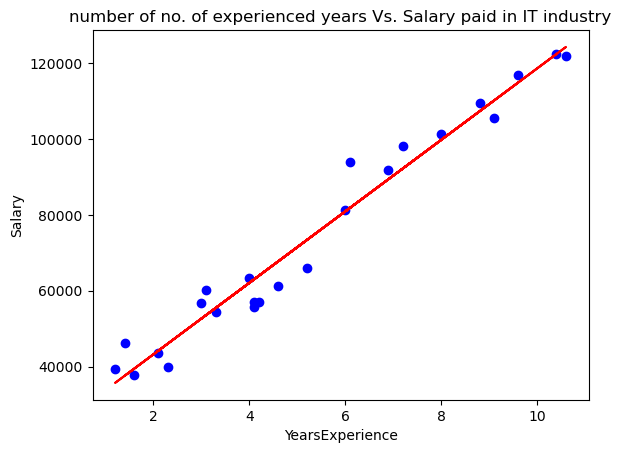

In [117]:
plt.scatter(x_train, y_train, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("number of no. of experienced years Vs. Salary paid in IT industry")  
plt.xlabel("YearsExperience")  
plt.ylabel("Salary")  
plt.show()   

In [142]:
Labs = np.array([1, 2, 3 , 4 , 5 , 6 , 7, 8, 9, 10])
Watts_Per_Lab = np.array([800,650,600,750,700,580,900,950,680,480])
hours = np.array([4,2,3,1,5,3,4,2,3,1])
units= (Watts_Per_Lab*hours)/1000


In [143]:
df = pd.DataFrame({'Labs': Labs,'hours': hours , 'units': units})
print(df)

   Labs  hours  units
0     1      4   3.20
1     2      2   1.30
2     3      3   1.80
3     4      1   0.75
4     5      5   3.50
5     6      3   1.74
6     7      4   3.60
7     8      2   1.90
8     9      3   2.04
9    10      1   0.48


In [156]:
df

,Labs,hours,units
0,1,4,3.20
1,2,2,1.30
2,3,3,1.80
3,4,1,0.75
4,5,5,3.50
5,6,3,1.74
6,7,4,3.60
7,8,2,1.90
8,9,3,2.04
9,10,1,0.48


C:\Users\asath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='units', ylabel='hours'>

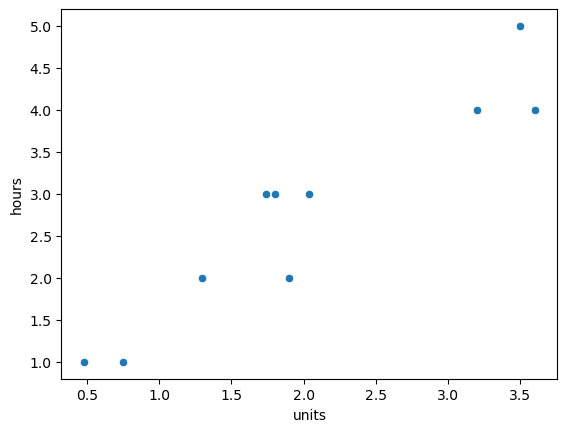

In [157]:
sns.scatterplot('units','hours',data=df)

<AxesSubplot:>

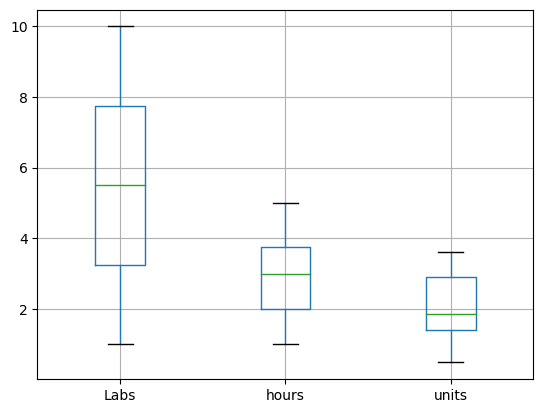

In [159]:
df.boxplot()

In [146]:
Labs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [147]:
units

array([3.2 , 1.3 , 1.8 , 0.75, 3.5 , 1.74, 3.6 , 1.9 , 2.04, 0.48])

In [148]:
x = np.array(df['units'])
y = np.array(df['hours'])
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [150]:
reg = LinearRegression()

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
x_pred = reg.predict(x_train)

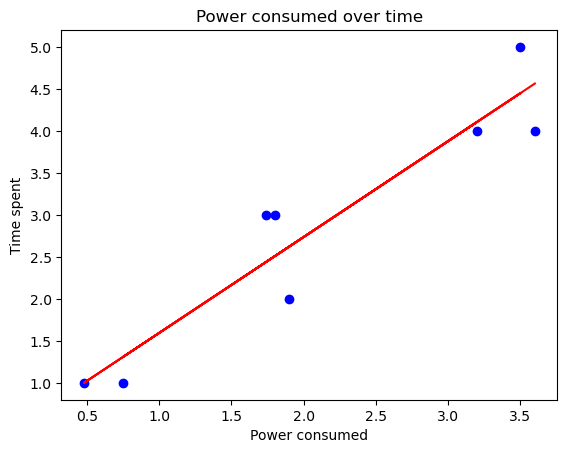

In [152]:
plt.scatter(x_train, y_train, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Power consumed over time")  
plt.xlabel("Power consumed")  
plt.ylabel("Time spent")  
plt.show()   

In [153]:
print(metrics.r2_score(y_test, y_pred))

0.8972075576817515


In [176]:
df = pd.read_csv(" ")

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20332 entries, 0 to 20331
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               20332 non-null  int64  
 1   country                  20332 non-null  object 
 2   iso_code                 20332 non-null  object 
 3   date                     20332 non-null  object 
 4   total_vaccinations       20332 non-null  float64
 5   people_vaccinated        20332 non-null  float64
 6   people_fully_vaccinated  20332 non-null  float64
 7   New_deaths               20332 non-null  int64  
 8   population               20332 non-null  float64
 9   ratio                    20332 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.6+ MB


In [182]:
df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40094444.0,1.119552
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40094444.0,1.173083
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40094444.0,1.188112
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40094444.0,1.195607
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40094444.0,1.196111
...,...,...,...,...,...,...,...,...,...,...
20327,20327,Zimbabwe,ZWE,2021-10-04,5441379.0,3117596.0,2323783.0,2,15158323.0,20.566893
20328,20328,Zimbabwe,ZWE,2021-10-05,5472485.0,3128598.0,2343887.0,0,15158323.0,20.639473
20329,20329,Zimbabwe,ZWE,2021-10-06,5499530.0,3140386.0,2359144.0,0,15158323.0,20.717239
20330,20330,Zimbabwe,ZWE,2021-10-07,5527583.0,3152617.0,2374966.0,3,15158323.0,20.797927


<AxesSubplot:xlabel='total_vaccinations', ylabel='New_deaths'>

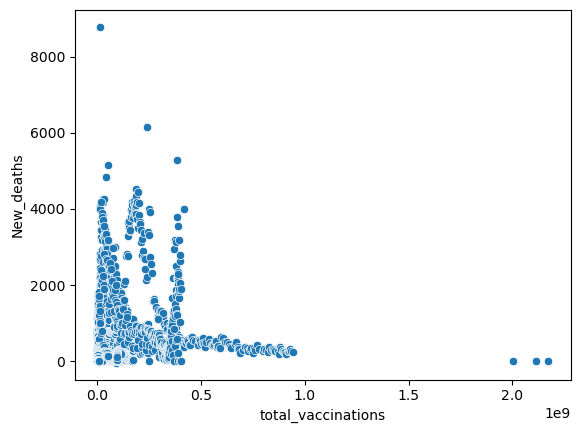

In [201]:
sns.scatterplot(x='total_vaccinations',y='New_deaths',data=df)

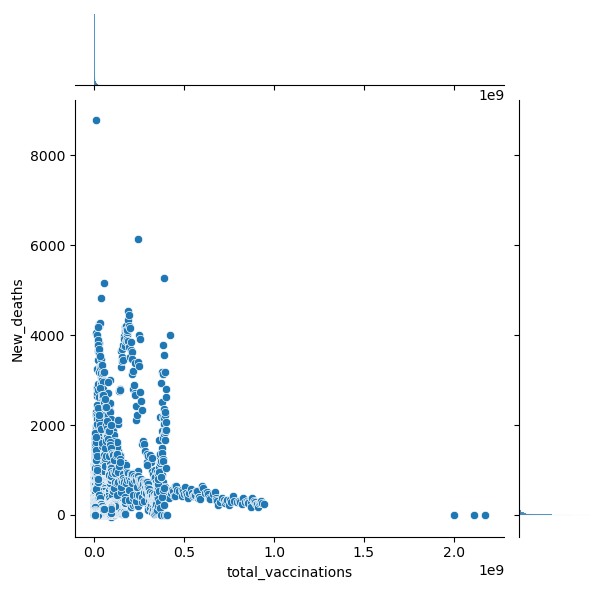

In [213]:
sns.jointplot(data=df, x='total_vaccinations',y='New_deaths')

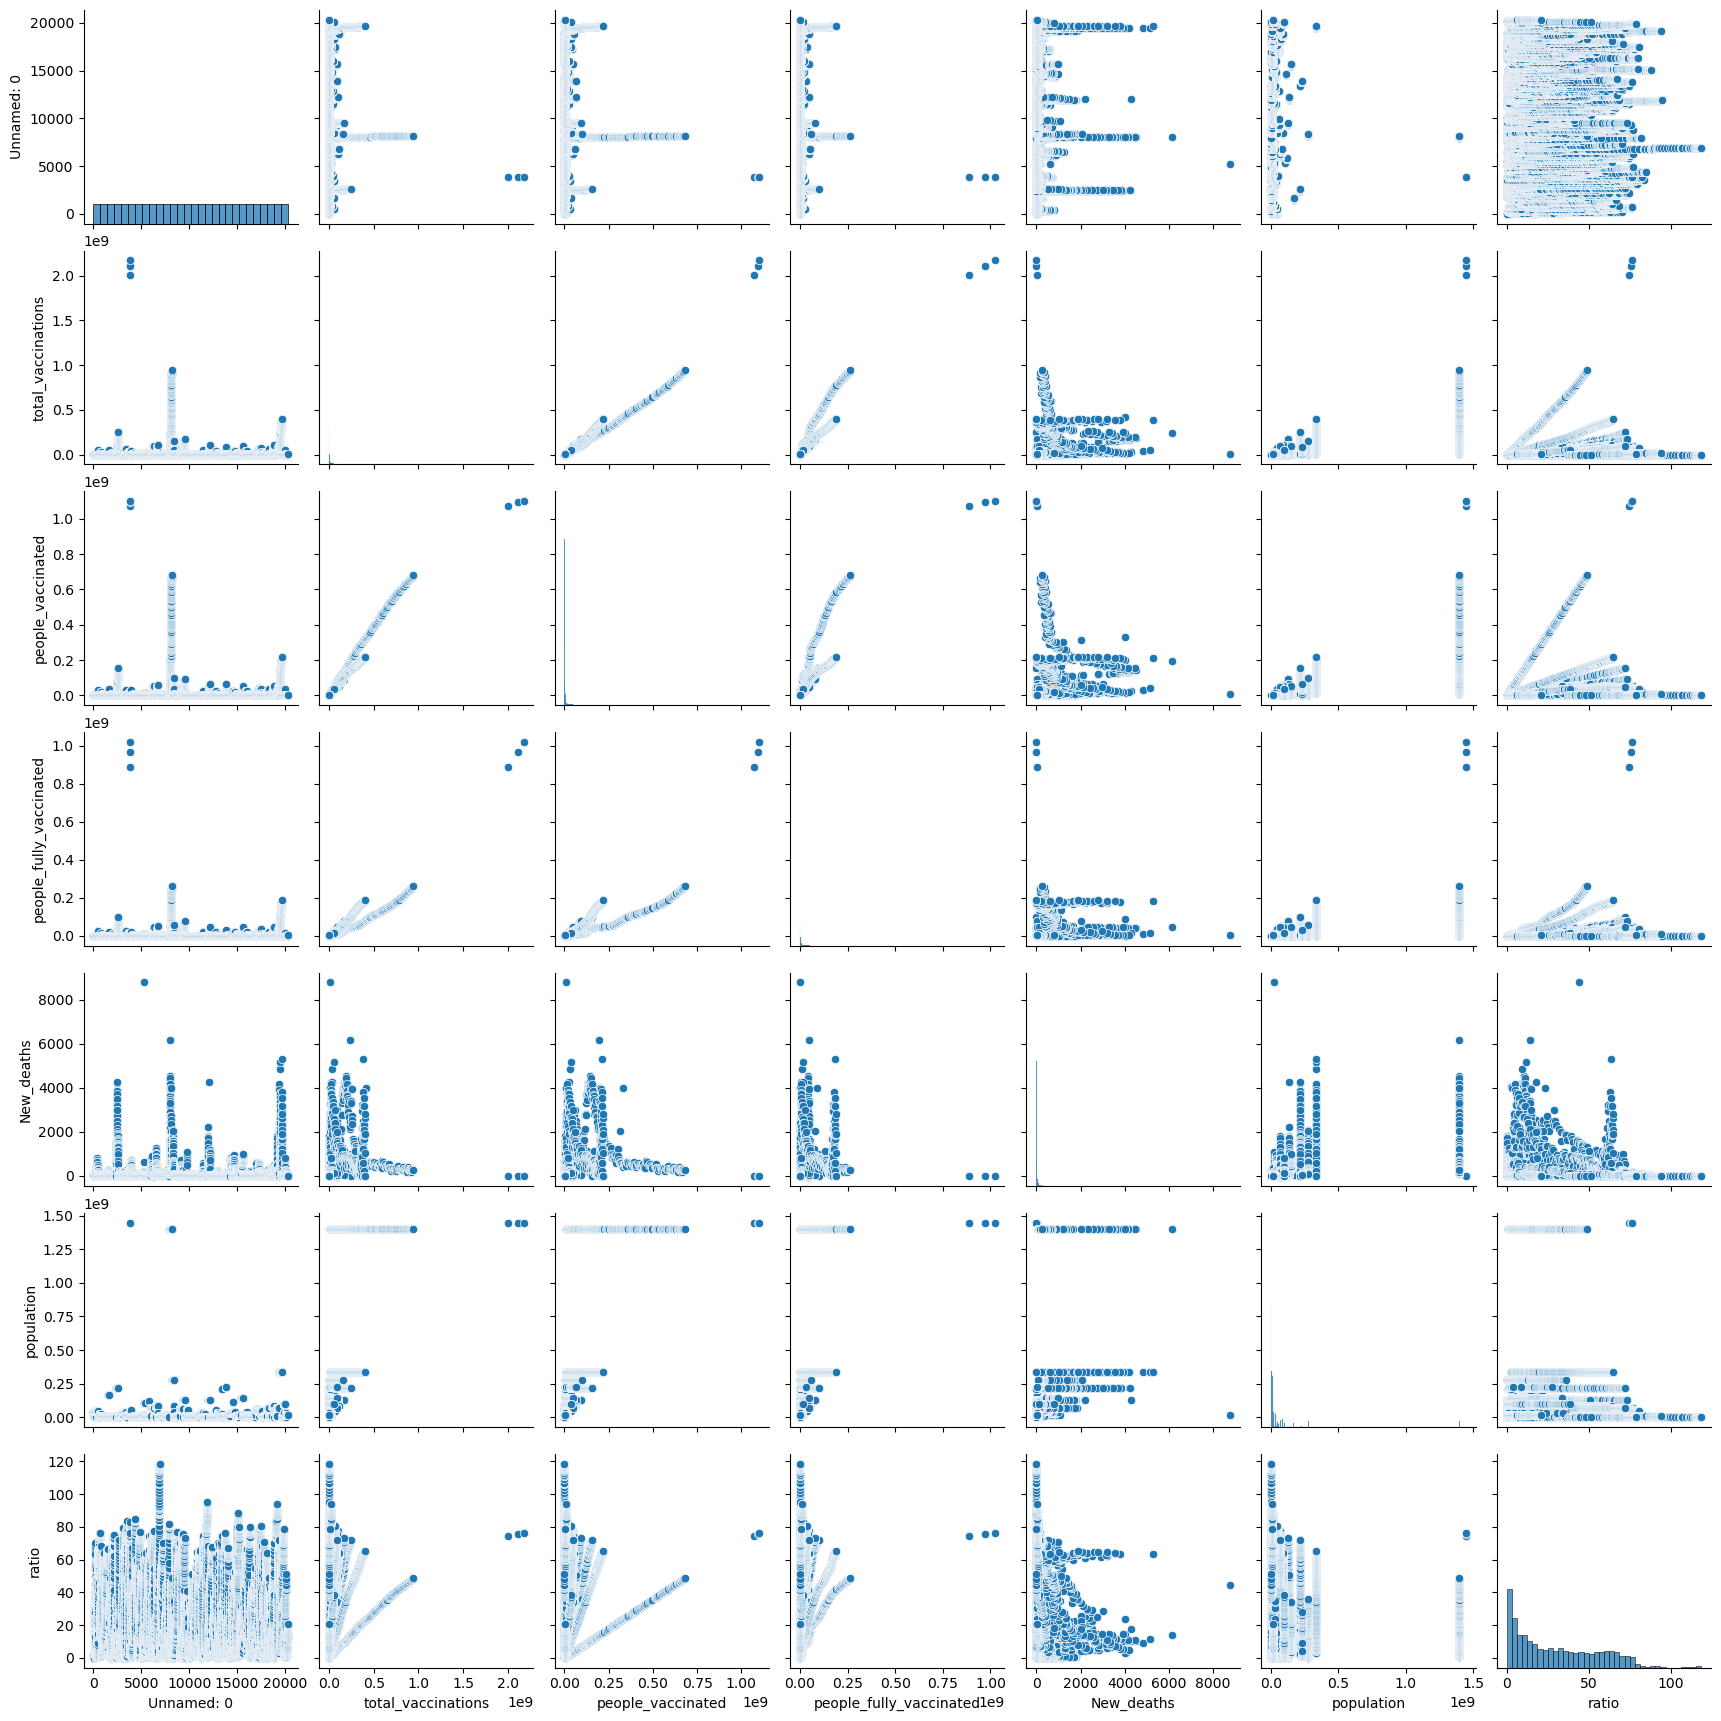

In [189]:
sns.pairplot(df)

<AxesSubplot:>

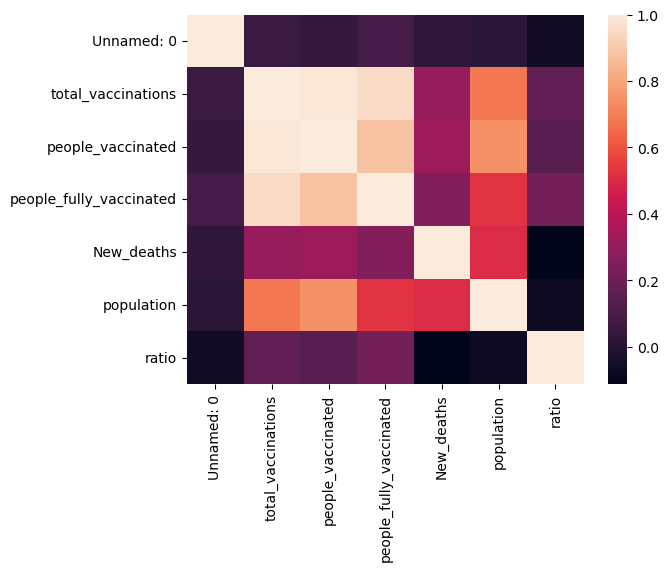

In [208]:
sns.heatmap(df.corr())

In [190]:
df.corr()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
Unnamed: 0,1.000000,0.059861,0.043005,0.090210,0.028123,0.012708,-0.064151
total_vaccinations,0.059861,1.000000,0.985602,0.948243,0.305047,0.686229,0.170965
people_vaccinated,0.043005,0.985602,1.000000,0.881845,0.319465,0.744189,0.139677
people_fully_vaccinated,0.090210,0.948243,0.881845,1.000000,0.259981,0.524252,0.217102
New_deaths,0.028123,0.305047,0.319465,0.259981,1.000000,0.501012,-0.113327
population,0.012708,0.686229,0.744189,0.524252,0.501012,1.000000,-0.077156
ratio,-0.064151,0.170965,0.139677,0.217102,-0.113327,-0.077156,1.000000


In [196]:
df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40094444.0,1.119552
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40094444.0,1.173083
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40094444.0,1.188112
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40094444.0,1.195607
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40094444.0,1.196111
...,...,...,...,...,...,...,...,...,...,...
20327,20327,Zimbabwe,ZWE,2021-10-04,5441379.0,3117596.0,2323783.0,2,15158323.0,20.566893
20328,20328,Zimbabwe,ZWE,2021-10-05,5472485.0,3128598.0,2343887.0,0,15158323.0,20.639473
20329,20329,Zimbabwe,ZWE,2021-10-06,5499530.0,3140386.0,2359144.0,0,15158323.0,20.717239
20330,20330,Zimbabwe,ZWE,2021-10-07,5527583.0,3152617.0,2374966.0,3,15158323.0,20.797927


In [197]:
x = np.array(df['total_vaccinations'])
y = np.array(df['New_deaths'])
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [199]:
reg = LinearRegression()

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
x_pred = reg.predict(x_train)

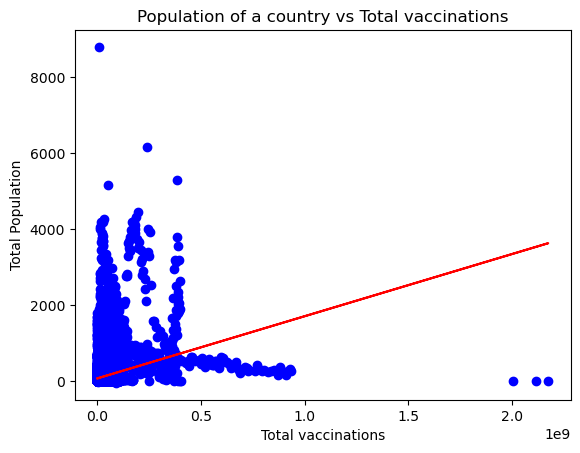

In [200]:
plt.scatter(x_train, y_train, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Population of a country vs Total vaccinations")  
plt.xlabel("Total vaccinations")  
plt.ylabel("Total Population")  
plt.show()   

In [212]:
print("coef", reg.coef_ )

coef [[1.63359616e-06]]
